<a href="https://colab.research.google.com/github/ianforrest11/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt

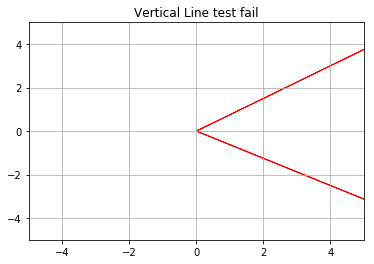

In [24]:
# Plot the Vectors failing veritcal line test
plt.arrow(0,0, 8, 6,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 8, -5,head_width=.05, head_length=0.05, color ='red')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Vertical Line test fail")
plt.grid(True)
plt.show()

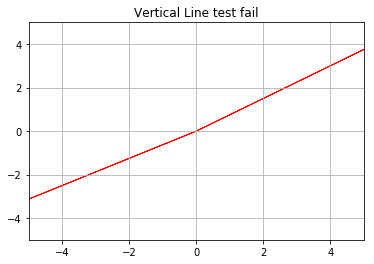

In [25]:
# Plot the Vectors passing veritcal line test
plt.arrow(0,0, 8, 6,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, -8, -5,head_width=.05, head_length=0.05, color ='red')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Vertical Line test pass")
plt.grid(True)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Graphs that don't pass the vertical line test are not considered functions because the vertical line test is a graphical representation for a function input having only one output.  

If a graph fails a vertical line test, it means there are multiple outputs for a single input

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

# Functions as a mapping between dimensions


Relation 2 is a function because each input generated one output.

## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Function 1:
- Dimensionality of domain = 3
- Dimensionality of codomain = 3

\\
Function 2:
- Dimensionality of domain = 4
- Dimensionality of codomain = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, it is possible.  There is a function called the Kernel trick, named after Sigmund Kernel, that when used with a support vector machine (SVM) moves from lower to higher dimensional space to find a hyperplane that can separate samples.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

1.)

\begin{align}
T_p = \begin{bmatrix} 1 & 3 \\ -1 &  2\end{bmatrix}
\end{align}

2.) \begin{align}
T_q = \begin{bmatrix} 4 & 1 & 2\\ -1 &  2 & 3\\ 5 & 1 & -2\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [45]:
import pandas as pd
import numpy as np

p = np.array([[1,3], 
              [-1,2]])
test_vector = np.array([3,4])
print(np.matmul(p,test_vector))


[15  5]


3 + 3(4) , 2(4) - 3   =   3 + 12 , 8 - 3   =   [15 ,  5]

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are dimensions of space that do not move after a matrix transformation has been applied.  However these eigenvectors have different magnitudes, which are measured as an eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Challenges of working with high dimensional spaces:
- require large
- more difficult to explore data
- more CPU time to process
- more difficult and time-consuming to create visualizations
- potential for diminshing returns/redundencies in data

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [0]:
As a rule of thumb, you should have at lease five rows for every column of data that exists

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import statistics as stat
import numpy as np
import pandas as pd
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [0]:
# import dataframe, remove text column

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df = df.iloc[:,0:4]

In [0]:
# find means
means = df.mean()

# standardize columns
z = (df - means)/np.std(df)

# create covariance matrix
covariance_matrix = z.cov()

# eigen decomposition of covariance matrix
values, vectors = eig(covariance_matrix)

In [0]:
# find PCA
pca = PCA(2)
pca.fit(df)

# Generate projected data
B = pca.transform(df)

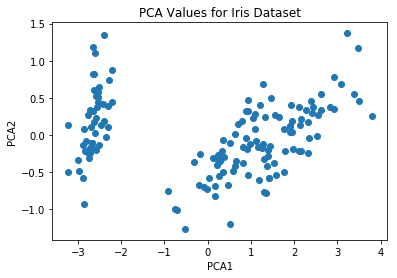

In [103]:
# Graph results

plt.scatter(B[:,0],B[:,1])
plt.title('PCA Values for Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show();

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)